In [50]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import WordNetLemmatizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer


os.getcwd()

'c:\\Users\\Dell\\MASTER COURSES\\CapGemini Datacamp\\Energy-Industry-NLP\\Data Preprocessing'

##### Additional Remarks on what could be improved:
- Almost every text has "date de l'experience" section at the end. We can remove it.
- Nu

### Read Data

In [314]:
toten = pd.read_csv("TotalEnergies_reviews.csv", index_col=0)
eni = pd.read_csv("eni_reviews.csv", index_col=0)

In [315]:
display(toten.head())

text  grade             date
0  Service électricité très bien mais si…\nServic...      1  Il y a 9 heures
1  Honteux\nHonteux, si je pouvais mettre zéro il...      1   Il y a un jour
2  incompréhension avec le service client…\nincom...      1   ll y a 2 jours
3  très satisfaite\nEn souscrivant en ligne je vo...      5   Il y a un jour
4  Très bonne application\nTrès bonne application...      5   ll y a 5 jours

In [316]:
display(eni.head())

text  grade             date
0  Catastrophe énergétique\nPremière souscription...      1  Il y a 5 heures
1  Augmentation du prix de kWh X3\nAugmentation d...      1   ll y a 4 jours
2  BRAQUEURS ENI\nSimplement : échéancier 2022 : ...      1   ll y a 6 jours
3  Facture démentielle.\nFacture démentielle.\nLe...      1   ll y a 4 jours
4  A fuir !\nAyant un relevé tous les deux mois p...      1    26 janv. 2023

In [317]:
eni.grade.mean()

1.035

In [318]:
toten.grade.mean()

3.01

In [319]:
#Merge 2 dataframes
eni["company"] = "eni"
toten["company"] = "total"
df = pd.concat([eni, toten], ignore_index=True)
print(df.shape)
df.sample(5)

(400, 4)


text  grade  \
76   De la grosse daube cette compagnie…\nDe la gro...      1   
119  Offre de parrainage jamais reçue malgré plusie...      1   
142  Horreur !\nHorreur !\nJ'ai ouvert le contrat d...      1   
276  Comme monsieur Dubois et son message ci…\nComm...      1   
335  BREAKE NEWS !!! LUDOVIC a été débranché !\nBRE...      1   

                          date company  
76               25 juil. 2022     eni  
119  Actualisé le 27 nov. 2021     eni  
142                19 mai 2022     eni  
276              23 janv. 2023   total  
335              10 janv. 2023   total

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     400 non-null    object
 1   grade    400 non-null    int64 
 2   date     400 non-null    object
 3   company  400 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB


### Cleaning

In [321]:
#Check if date de l'experience doesn't exist
df["isDate"] = [df.text[i].find("Date de l'expérience:") for i in range(len(df))]
df[df.isDate == -1].isDate

Series([], Name: isDate, dtype: int64)

In [322]:
text_and_date = df.text.apply(lambda x:x.split("Date de l'expérience:"))
#text_and_date = df.apply(split_text(df.text, df.isDate))
df["text"] = [i[0] for i in text_and_date]
df["date"] = [i[1] for i in text_and_date]
df.drop("isDate", axis=1, inplace=True)

In [323]:
df.text[395]

'Rapide efficace et clair\n'

In [324]:
df.head()

text  grade              date  \
0  Catastrophe énergétique\nPremière souscription...      1   03 février 2023   
1  Augmentation du prix de kWh X3\nAugmentation d...      1   24 janvier 2023   
2  BRAQUEURS ENI\nSimplement : échéancier 2022 : ...      1   26 janvier 2023   
3  Facture démentielle.\nFacture démentielle.\nLe...      1   31 janvier 2023   
4  A fuir !\nAyant un relevé tous les deux mois p...      1   08 janvier 2023   

  company  
0     eni  
1     eni  
2     eni  
3     eni  
4     eni

__1.5- Get a look (a plot) of the PCA on your data__

### Visualizations

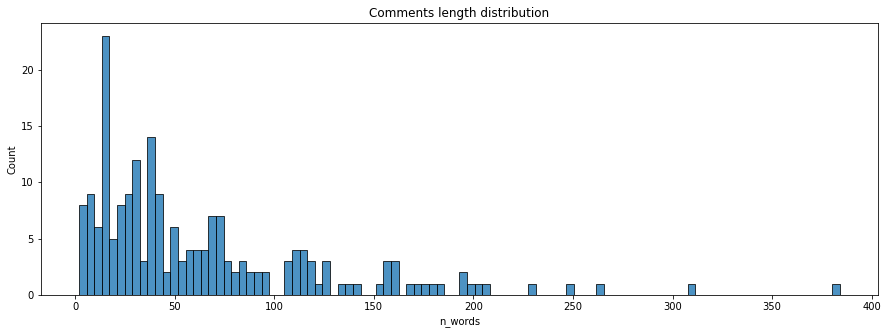

In [325]:
#Density plot of word frequency
df = df[df.company == "total"]
df["n_words"] = df['text'].str.split().apply(len).astype(int)
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['n_words'], bins=100, alpha=0.8)
plt.title('Comments length distribution')
plt.show()

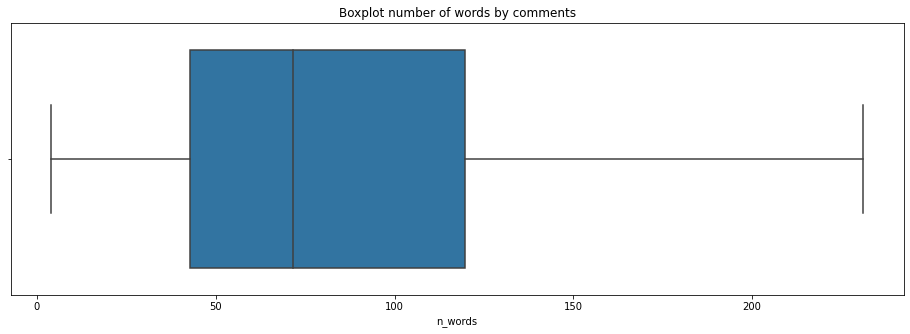

In [301]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(x=df['n_words'], showfliers=False)
plt.title('Boxplot number of words by comments')
plt.show()

### Date Visualizations 
Date formatting incomplete

In [326]:
#Format dates
df.date

200      03 février 2023
201      02 février 2023
202      01 février 2023
203      31 janvier 2023
204      29 janvier 2023
             ...        
395     08 novembre 2022
396     04 novembre 2022
397      24 octobre 2022
398      28 octobre 2022
399      26 octobre 2022
Name: date, Length: 200, dtype: object

In [327]:
def format_date(date_string):
    from datetime import datetime
    french_months = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']
    date_string = date_string.lstrip().rstrip()
    date_components = date_string.split(" ")
    day = int(date_components[0])
    month = french_months.index(date_components[1]) + 1
    year = int(date_components[2])

    date = datetime(year, month, day)
    return date

df["date"] = df.date.apply(format_date)

In [328]:
df.date

200   2023-02-03
201   2023-02-02
202   2023-02-01
203   2023-01-31
204   2023-01-29
         ...    
395   2022-11-08
396   2022-11-04
397   2022-10-24
398   2022-10-28
399   2022-10-26
Name: date, Length: 200, dtype: datetime64[ns]

In [329]:
df["month"] = df.date.dt.strftime("%Y-%m")
ratings_by_month = df.groupby("month").mean()["grade"].copy().rename("date")
ratings_by_month

C:\Users\Dell\AppData\Local\Temp\ipykernel_6164\4151392063.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratings_by_month = df.groupby("month").mean()["grade"].copy().rename("date")


month
2022-01    5.000000
2022-02    5.000000
2022-05    1.000000
2022-06    5.000000
2022-07    3.000000
2022-09    2.250000
2022-10    3.440000
2022-11    2.975610
2022-12    2.692308
2023-01    3.166667
2023-02    2.000000
Name: date, dtype: float64

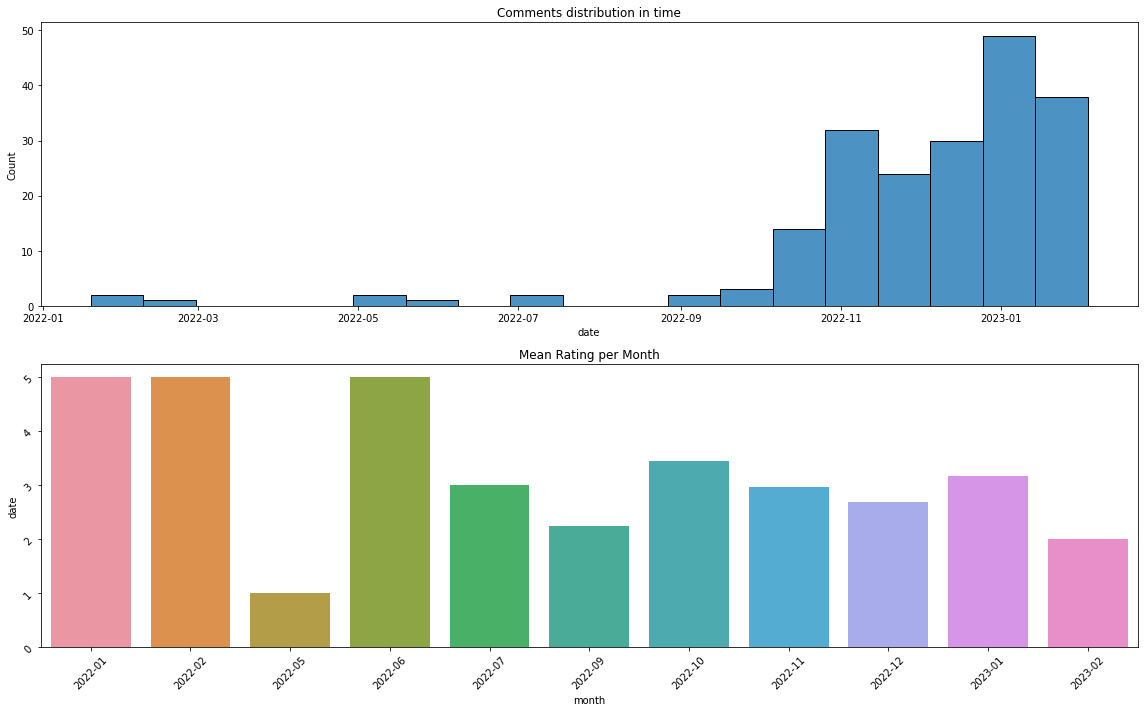

In [330]:
import calendar
month_index = list(calendar.month_name)[1:]
day_index = list(calendar.day_name)
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

sns.histplot(data=df['date'], ax=axes[0], alpha=0.8).set(title='Comments distribution in time')
sns.barplot(x=ratings_by_month.index, y=ratings_by_month, ax=axes[1]).set(title="Mean Rating per Month")
axes[1].tick_params(labelrotation=45)
plt.tight_layout()


### Text Formatting

In [128]:
corpus = df['text'].tolist()
corpus[:3]

["Service électricité très bien mais si…\nService électricité très bien mais si vous avez un surplus de règlement ça se complique.\nLe mot le plus employé par les services patience 🤢🤢🤢\nC'est pas un service comptable qu ils ont à priori mais plutôt une usine à gaz...\nFranchement j'ai les nerfs de faire la trésorerie de Total\n",
 "Honteux\nHonteux, si je pouvais mettre zéro ils le mériteraient.\nQuand on les appel et qu'on appuie sur l'option parler avec un agent, dans la seconde ça raccroche automatiquement! Donc impossibilité de parler avec un agent !!\nPar contre si vous n'êtes pas client, ils seront bien la pour vous répondre et dans les secondes!! Tout pour le fric et nouveaux clients mais rien pour leurs clients!\n",
 "incompréhension avec le service client…\nincompréhension avec le service client au sujet d’augmentation de l’électricité de 3,77% en janvier alors que le prix est encore bloqué jusqu’au 1er février et de 16,83% pour le gaz en janvier alors que le gouvernement n'a 

In [129]:
corpus = [comment.lower() for comment in corpus]
corpus[:3]

["service électricité très bien mais si…\nservice électricité très bien mais si vous avez un surplus de règlement ça se complique.\nle mot le plus employé par les services patience 🤢🤢🤢\nc'est pas un service comptable qu ils ont à priori mais plutôt une usine à gaz...\nfranchement j'ai les nerfs de faire la trésorerie de total\n",
 "honteux\nhonteux, si je pouvais mettre zéro ils le mériteraient.\nquand on les appel et qu'on appuie sur l'option parler avec un agent, dans la seconde ça raccroche automatiquement! donc impossibilité de parler avec un agent !!\npar contre si vous n'êtes pas client, ils seront bien la pour vous répondre et dans les secondes!! tout pour le fric et nouveaux clients mais rien pour leurs clients!\n",
 "incompréhension avec le service client…\nincompréhension avec le service client au sujet d’augmentation de l’électricité de 3,77% en janvier alors que le prix est encore bloqué jusqu’au 1er février et de 16,83% pour le gaz en janvier alors que le gouvernement n'a 

In [130]:
from gensim.parsing.preprocessing import remove_stopwords
import unidecode


def clean_sentence(sentence, stopwords=False):
    sentence = sentence.lower().strip() #lowercase
    sentence = unidecode.unidecode(sentence) #remove accents from letters
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence) #remove non-alphanumeric characters
    sentence = re.sub(r"\d+", "", sentence) #remove numbers
    sentence = re.sub(r"\s+"," ",sentence) #remove whitespace
    sentence = sentence.rstrip().lstrip() #remove space at the beginning and end if it exists
    
    return sentence

df["clean_text"] = df.text.apply(clean_sentence)
df.clean_text[:3]

C:\Users\Dell\AppData\Local\Temp\ipykernel_6164\1130367381.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df.clean_text[:3]


200    service electricite tres bien mais si service ...
201    honteux honteux si je pouvais mettre zero ils ...
202    incomprehension avec le service client incompr...
Name: clean_text, dtype: object

In [132]:
df.clean_text[200]

'service electricite tres bien mais si service electricite tres bien mais si vous avez un surplus de reglement ca se complique le mot le plus employe par les services patience cest pas un service comptable qu ils ont a priori mais plutot une usine a gaz franchement jai les nerfs de faire la tresorerie de total'

In [133]:
df.text[200]

"Service électricité très bien mais si…\nService électricité très bien mais si vous avez un surplus de règlement ça se complique.\nLe mot le plus employé par les services patience 🤢🤢🤢\nC'est pas un service comptable qu ils ont à priori mais plutôt une usine à gaz...\nFranchement j'ai les nerfs de faire la trésorerie de Total\n"

In [134]:
tokenized_corpus = [re.split('\s+', comment) for comment in df.clean_text]
#print(len(tokenized_corpus))
print(tokenized_corpus[0])
df["tokenized_text"] = tokenized_corpus

['service', 'electricite', 'tres', 'bien', 'mais', 'si', 'service', 'electricite', 'tres', 'bien', 'mais', 'si', 'vous', 'avez', 'un', 'surplus', 'de', 'reglement', 'ca', 'se', 'complique', 'le', 'mot', 'le', 'plus', 'employe', 'par', 'les', 'services', 'patience', 'cest', 'pas', 'un', 'service', 'comptable', 'qu', 'ils', 'ont', 'a', 'priori', 'mais', 'plutot', 'une', 'usine', 'a', 'gaz', 'franchement', 'jai', 'les', 'nerfs', 'de', 'faire', 'la', 'tresorerie', 'de', 'total']


### Remove Stopwords

In [135]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
stop_words = nltk.corpus.stopwords.words("french")
stop_words = [unidecode.unidecode(stopword) for stopword in stop_words]
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'meme', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'a', 'm', 'n', 's', 't', 'y', 'ete', 'etee', 'etees', 'etes', 'etant', 'etante', 'etants', 'etantes', 'suis', 'es', 'est', 'sommes', 'etes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'etais', 'etait', 'etions', 'etiez', 'etaient', 'fus', 'fut', 'fumes', 'futes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fut', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [137]:
tokenized_wo_stopwords = [[token for token in sentence if token not in stop_words] for sentence in tokenized_corpus]
print(tokenized_wo_stopwords[0])
df["tokenized_text"] = tokenized_wo_stopwords

['service', 'electricite', 'tres', 'bien', 'si', 'service', 'electricite', 'tres', 'bien', 'si', 'surplus', 'reglement', 'ca', 'complique', 'mot', 'plus', 'employe', 'services', 'patience', 'cest', 'service', 'comptable', 'priori', 'plutot', 'usine', 'gaz', 'franchement', 'jai', 'nerfs', 'faire', 'tresorerie', 'total']


### Defining n-grams

In [138]:
# unigram
df.tokenized_text

200    [service, electricite, tres, bien, si, service...
201    [honteux, honteux, si, pouvais, mettre, zero, ...
202    [incomprehension, service, client, incomprehen...
203    [tres, satisfaite, souscrivant, ligne, voulais...
204    [tres, bonne, application, tres, bonne, applic...
                             ...                        
395                            [rapide, efficace, clair]
396    [souscription, total, energie, explicite, donc...
397                                 [bien, cordialement]
398                                    [aucun, probleme]
399                                    [aucun, probleme]
Name: tokenized_text, Length: 200, dtype: object

In [139]:
#bigram
df["bigrams"] = [nltk.bigrams(i) for i in df.tokenized_text]
df["bigrams"] = [[i for i in item] for item in df.bigrams] 
df.bigrams

200    [(service, electricite), (electricite, tres), ...
201    [(honteux, honteux), (honteux, si), (si, pouva...
202    [(incomprehension, service), (service, client)...
203    [(tres, satisfaite), (satisfaite, souscrivant)...
204    [(tres, bonne), (bonne, application), (applica...
                             ...                        
395              [(rapide, efficace), (efficace, clair)]
396    [(souscription, total), (total, energie), (ene...
397                               [(bien, cordialement)]
398                                  [(aucun, probleme)]
399                                  [(aucun, probleme)]
Name: bigrams, Length: 200, dtype: object

In [140]:
df["trigrams"] = [nltk.trigrams(i) for i in df.tokenized_text]
df["trigrams"] = [[i for i in item] for item in df.trigrams] 
df.trigrams

200    [(service, electricite, tres), (electricite, t...
201    [(honteux, honteux, si), (honteux, si, pouvais...
202    [(incomprehension, service, client), (service,...
203    [(tres, satisfaite, souscrivant), (satisfaite,...
204    [(tres, bonne, application), (bonne, applicati...
                             ...                        
395                          [(rapide, efficace, clair)]
396    [(souscription, total, energie), (total, energ...
397                                                   []
398                                                   []
399                                                   []
Name: trigrams, Length: 200, dtype: object

### Term Frequency

In [141]:
wordSet = set().union(*df.tokenized_text)
len(wordSet)

2268

In [142]:
wordDict = []

for i in range(len(df.tokenized_text)):
    wordDict.append(dict.fromkeys(wordSet, 0))


In [143]:
for i, sent in enumerate(df.tokenized_text): 
    for word in sent:
        wordDict[i][word]+=1

In [144]:
#assign word_dict to dataframe, useful for the computations later 
word_df = pd.DataFrame(wordDict)

In [145]:
#length of phrases (check if the dict is correct)
word_df[word_df == 1].sum(axis=1)

0      21.0
1      26.0
2      31.0
3      19.0
4      25.0
       ... 
195     3.0
196     6.0
197     2.0
198     2.0
199     2.0
Length: 200, dtype: float64

In [146]:
df["wordDict"] = wordDict

In [147]:
#check for blank words
try:
    df["empt"] = [i[""] for i in df.wordDict]
    empt = df[df.empt != 0]
except:
    print("no empty words")

no empty words


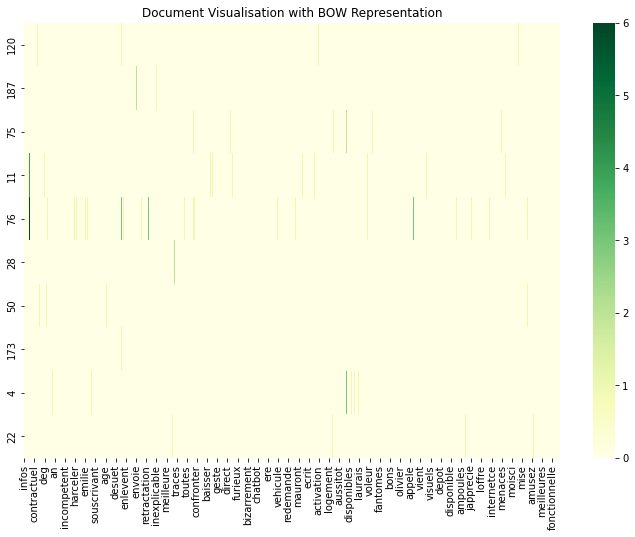

In [148]:
plt.figure(figsize=(12,8))
sns.heatmap(word_df.sample(10), cmap='YlGn')
plt.title('Document Visualisation with BOW Representation')
plt.show()

In [149]:
df_mean = word_df.mean().sort_values(ascending=False).to_frame(name='occurence mean')

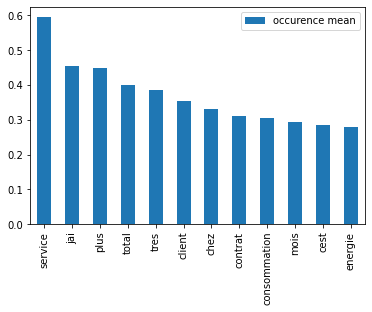

In [150]:
df_mean[:12].plot.bar()
plt.show()

In [152]:
df.reset_index(inplace=True)
def compute_TF(wordDict, tokens):
    tfDict = {}
    bowCount = len(tokens)
    for word, count in wordDict.items():
        if bowCount>0:
            tfDict[word] = count/float(bowCount)
        else:
            tfDict[word] = 0
    return tfDict

df["tfBOW"] = [compute_TF(wordDict=df.wordDict[i], tokens=df.tokenized_text[i])
                  for i in range(len(df))]

In [153]:
df.tfBOW

0      {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
1      {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
2      {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
3      {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
4      {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
                             ...                        
195    {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
196    {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
197    {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
198    {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
199    {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
Name: tfBOW, Length: 200, dtype: object

In [154]:
import math
def compute_IDF(wordDict):
    idfDict = {}
    N = len(wordDict)
    idfDict = dict.fromkeys(wordDict[0].keys(), 0)
    #print(idfDict)
    for doc in wordDict:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1 #if the word is in the document
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
#         idfDict[word] = N / float(val)
# Now there are few other problems with the IDF, in case of a large corpus,
# say 10,000, the IDF value explodes. So to dampen the effect we take log of IDF.
    return idfDict

IDF = compute_IDF(wordDict=df.wordDict)

In [155]:
def compute_TFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

df["tfIDF"] = [compute_TFIDF(df.tfBOW[i], IDF) for i in range(len(df))]

In [156]:
df.tfIDF

0      {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
1      {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
2      {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
3      {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
4      {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
                             ...                        
195    {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
196    {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
197    {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
198    {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
199    {'infos': 0.0, 'souci': 0.0, 'cette': 0.0, 'ja...
Name: tfIDF, Length: 200, dtype: object

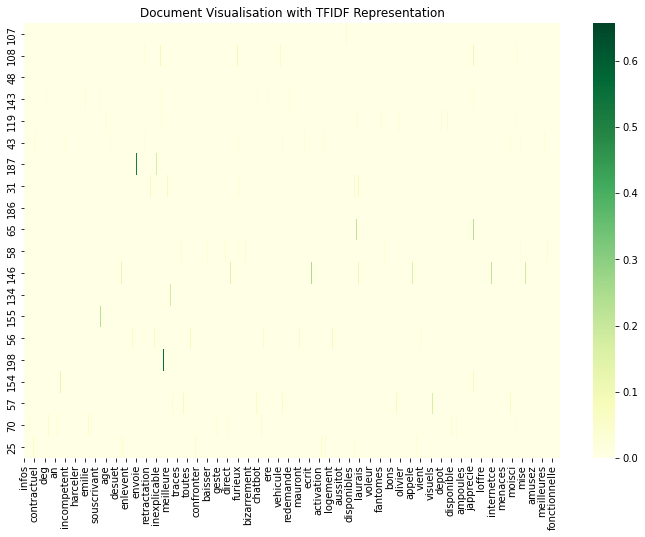

In [157]:
#one way to make more meaningful visualizations is to somehow keep the words that are most frequent
tfidf = pd.DataFrame(list(df.tfIDF))
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf.sample(20), cmap='YlGn')
plt.title('Document Visualisation with TFIDF Representation')
plt.show()

In [158]:
print('A few words with lowest tfidf\n\n',tfidf.apply(sum).sort_values()[:3])
print('\n\nWords with largest tfidf\n\n',tfidf.apply(sum).sort_values()[-3:])

A few words with lowest tfidf

 superieurs    0.011116
minforme      0.011116
informant     0.011116
dtype: float64


Words with largest tfidf

 efficace    2.036023
service     2.153672
tres        2.579891
dtype: float64


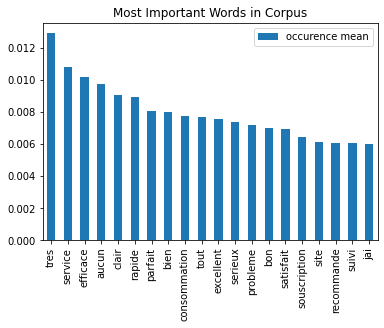

In [179]:
tfidf_mean = tfidf.mean().sort_values(ascending=False)[:20].to_frame(name='occurence mean')
tfidf_mean.plot.bar(title="Most Important Words in Corpus")
plt.show()

### WordCloud

In [160]:
from wordcloud import WordCloud
from PIL import Image

In [161]:
tfidf_mean = tfidf.mean().sort_values(ascending=False).to_frame(name='tfidf mean')
dict_words_tfidf = tfidf_mean[tfidf_mean['tfidf mean'] != 0].to_dict()['tfidf mean']

In [162]:
tfidf_mean.head()

tfidf mean
tres        0.012899
service     0.010768
efficace    0.010180
aucun       0.009714
clair       0.009057

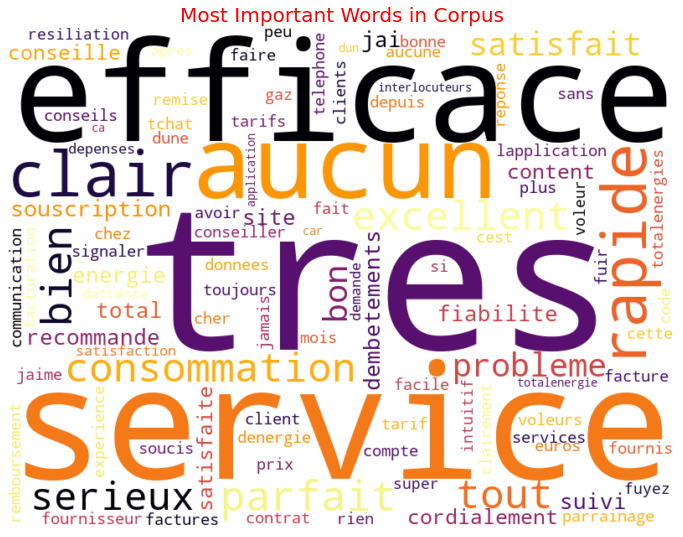

In [197]:
wordcloud = WordCloud(height=600, width=800, background_color="white", colormap='inferno', max_words=100)
wordcloud.generate_from_frequencies(frequencies=dict_words_tfidf)
plt.figure(figsize=(12,16))
plt.title("Most Important Words in Corpus", fontsize=20, color="red")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [165]:
#stemming and lemmatization
WordNetLemmatizer, SnowballStemmer
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("french")

df["lemmatized_text"] = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in df.tokenized_text]
        
df["stemmed_text"] = [[stemmer.stem(word) for word in tokens] for tokens in df.tokenized_text]

In [166]:
print((df.lemmatized_text == df.tokenized_text).all())
print((df.stemmed_text == df.tokenized_text).all())

False
False


In [167]:
df.stemmed_text

0      [servic, electricit, tre, bien, si, servic, el...
1      [honteux, honteux, si, pouv, mettr, zero, meri...
2      [incomprehens, servic, client, incomprehens, s...
3      [tre, satisfait, souscriv, lign, voul, avoir, ...
4      [tre, bon, appliqu, tre, bon, appliqu, jai, ac...
                             ...                        
195                              [rapid, efficac, clair]
196      [souscript, total, energ, explicit, donc, parf]
197                                      [bien, cordial]
198                                     [aucun, problem]
199                                     [aucun, problem]
Name: stemmed_text, Length: 200, dtype: object

In [168]:
df.lemmatized_text

0      [service, electricite, tres, bien, si, service...
1      [honteux, honteux, si, pouvais, mettre, zero, ...
2      [incomprehension, service, client, incomprehen...
3      [tres, satisfaite, souscrivant, ligne, voulais...
4      [tres, bonne, application, tres, bonne, applic...
                             ...                        
195                            [rapide, efficace, clair]
196    [souscription, total, energie, explicite, donc...
197                                 [bien, cordialement]
198                                    [aucun, probleme]
199                                    [aucun, probleme]
Name: lemmatized_text, Length: 200, dtype: object

In [169]:
df.to_csv("corpus_total.csv",index=False)

### BONUS Lemmatization

In [52]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Rehan
[nltk_data]     Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Rehan
[nltk_data]     Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [53]:
def clean_text(corpus, lemmatize=False, stemming=False):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("french")

    cleaned_corpus = []
    for text in corpus:
        tokens = word_tokenize(text)
        if lemmatize:
            tokens = [lemmatizer.lemmatize(word) for word in tokens]
        elif stemming:
            tokens = [stemmer.stem(word) for word in tokens]
        
        cleaned_text = " ".join(tokens)
        cleaned_corpus.append(cleaned_text)
    
    return cleaned_corpus

In [54]:
clean_text(df.text, stemming=True)[:3]

["catastroph énerget premi souscript avec eux en 2021 : pour la premi anné aucun régularis en 2022 à fair mont annuel 880 euros deuxiem anné 2022 factur de régularis en 2023 de 1137 euros pour un mont total de consomm de 1880 euros . j'ai essai de vérifi ma consomm sur mon espac client , je remarqu que le don affich ne sont pas cohérent ( dan un mois de l'ann j'et en vacanc , il n ' y avait person à la maison et tout le appareil était éteint ) . j'ai appel le servic client le 01/02/2023 pour avoir de expliqu , la conseiller me dis qu'el n ' a pas plus de visibil sur mon dossi , elle a demand l'intervent d'un autr servic qui au jour d'aujourd'hui ne m ' a pas rappel . une catastroph total , je regret d'avoir chois eni",
 "augment du prix de kwh x3 augment du prix de kwh x3 . le 4 derni mois équivalent à 1an de consomm habituel . aucun commun de l'entrepris . impossibl de le avoir au téléphon et aucun répons au mail . un recour est lanc par recommand et le médiateur de l'énerg ser mandat

### Bonus wordcloud

In [55]:
def plot_wordcloud(text, title=None, figure_size=(12, 8)):
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(" ".join(text))
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

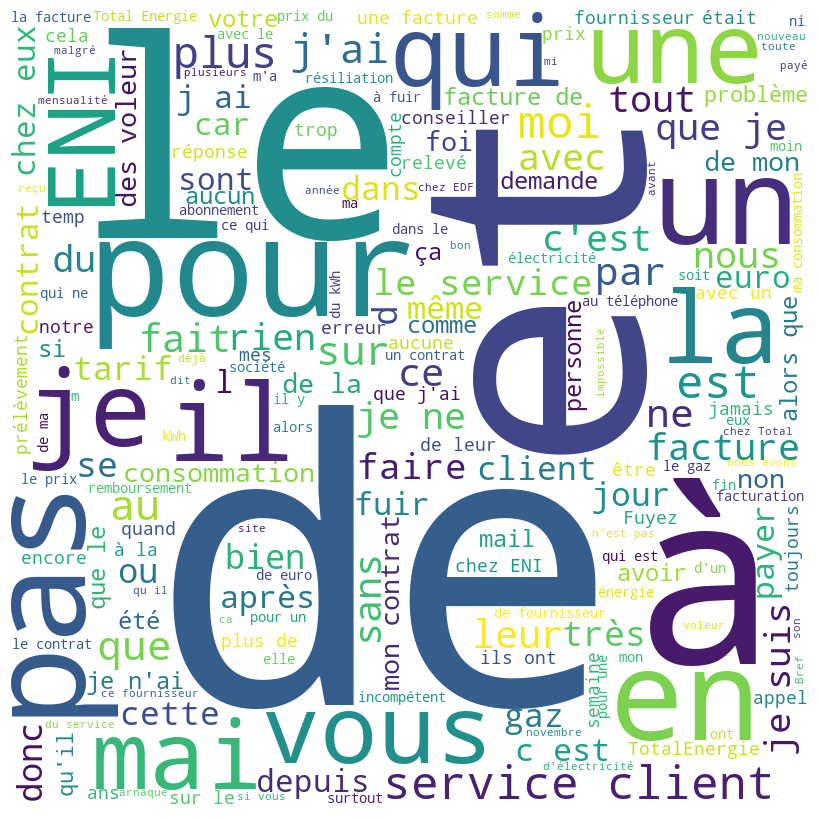

In [56]:
plot_wordcloud(df.text)

## Bonus 3: TFIDF for bigrams 

In [184]:
wordSet = set().union(*df.bigrams)
wordDict = []

for i in range(len(df.bigrams)):
    wordDict.append(dict.fromkeys(wordSet, 0))


for i, sent in enumerate(df.bigrams): 
    for word in sent:
        wordDict[i][word]+=1


IDF = compute_IDF(wordDict=wordDict)
tfBOW = [compute_TF(wordDict=wordDict[i], tokens=df.bigrams[i])
                  for i in range(len(df))]
tfIDF = [compute_TFIDF(tfBOW[i], IDF) for i in range(len(tfBOW))]

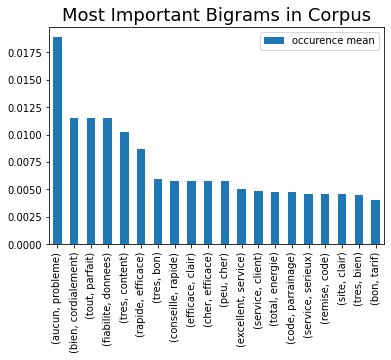

In [200]:
tfIDF = pd.DataFrame(tfIDF)
tfidf_mean = tfIDF.mean().sort_values(ascending=False)[:20].to_frame(name='occurence mean')
tfidf_mean.plot.bar()
plt.title("Most Important Bigrams in Corpus", fontsize=18)
plt.xticks(rotation = 90)
plt.show()

In [186]:
tfIDF

[{('comme', 'fournisseur'): 0.0,
  ('faz', 'cuisiniere'): 0.0,
  ('conso', 'utile'): 0.0,
  ('intuitif', 'site'): 0.0,
  ('jusquau', 'er'): 0.0,
  ('positifs', 'laisses'): 0.0,
  ('restrictions', 'deau'): 0.0,
  ('systeme', 'domotique'): 0.0,
  ('energie', 'mont'): 0.0,
  ('commentaires', 'cela'): 0.0,
  ('prendre', 'idiote'): 0.0,
  ('plus', 'nhesite'): 0.0,
  ('demarche', 'tel'): 0.0,
  ('tant', 'mieux'): 0.0,
  ('couvrefeus', 'interdictions'): 0.0,
  ('devait', 'recontacter'): 0.0,
  ('lelectricite', 'gaz'): 0.0,
  ('souscription', 'aini'): 0.0,
  ('interdictions', 'tout'): 0.0,
  ('peut', 'etre'): 0.0,
  ('claires', 'explications'): 0.0,
  ('gerer', 'mensualites'): 0.0,
  ('recommandable', 'scandaleux'): 0.0,
  ('tarif', 'heures'): 0.0,
  ('client', 'aucun'): 0.0,
  ('avant', 'detre'): 0.0,
  ('frustrant', 'recommande'): 0.0,
  ('excellent', 'trouve'): 0.0,
  ('cela', 'abuse'): 0.0,
  ('conso', 'gaz'): 0.0,
  ('yaiche', 'alors'): 0.0,
  ('retourne', 'chez'): 0.0,
  ('android', 'enc